题目：

作为工厂的生产主管，你要决定某芯片是否要被接受或抛弃，该芯片在两次测试中的结果保存在数据集：ex2data2.txt

## 1.导入数据

1.导入库

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

2.导入数据集

In [76]:
path = 'ex2data2.txt'
data = pd.read_csv(path, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


3.数据可视化

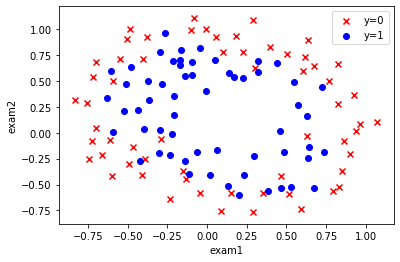

In [77]:
fig,ax = plt.subplots()
# 绘制标签为 0 的散点图
ax.scatter(data[data['Accepted']==0]['Test 1'], data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
# 绘制标签为 1 的散点图  
ax.scatter(data[data['Accepted']==1]['Test 1'], data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='exam1', ylabel='exam2')
plt.show()

## 2. 特征映射 Feature Mapping

从上图可以看出，该逻辑回归的样本数量多，且分布是非线性的，而原始特征只有x1,x2 x1,x2x1,x2，给分类带来不小难度。

解决办法是用多项式创建更多的特征x1、x2、x1x2、...。因为更多的特征进行逻辑回归时，得到的决策边界可以是任意高阶函数的形状。

In [78]:
def feature_mapping(x1,x2,power):
    data = {}    # 字典 保存特征多项式
    
    for i in np.arange(power+1):   # i的范围是(0,power]，整数
        for j in np.arange(i + 1):  # j的范围是(0,i]，整数
            data['F{}{}'.format(i-j,j)] = np.power(x1,i-j) * np.power(x2,j)    
    
    return pd.DataFrame(data)   #字典转化为DataFrame并返回

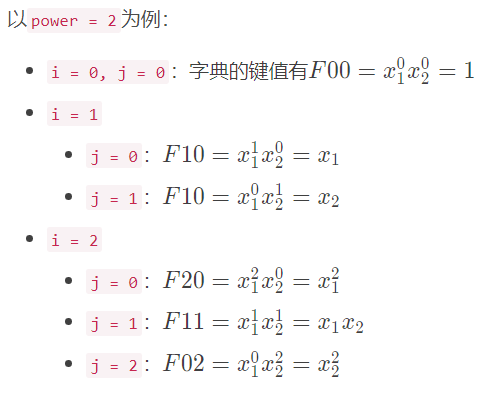

## 3.构造数据集

1.获取特征映射后的特征集

In [79]:
# 获取原始特征作为 feature_mapping 的参数
x1 = data['Test 1'].values #获得第一个特征数据
x2 = data['Test 2'].values #获得第二个特征数据
_data2 = feature_mapping(x1, x2, 6)   #两个特征进行最多六次幂的特征映射

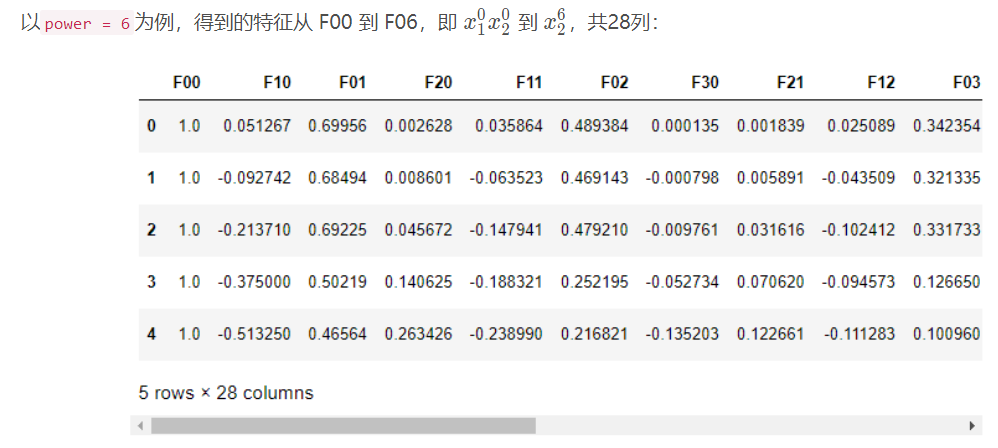

2.获取输入输出向量 X,y及参数向量 θ

In [97]:
X = _data2.values                 #获得特征数据
y = data['Accepted'].values       #获得标签数据
theta = np.zeros(X.shape[1])      #初始化参数,列数为1，行数与特征数据列数一致

用 X.shape 、 y.shape 和theta.shape查看数组的维度 ，维度分别为（118，28）、（118，1）和（28，1）


## 4.代价函数 正则化

由于特征映射后维数较高，模型更复杂，容易产生过拟合现象，因此需要对代价函数正则化(Regularize)（或称 加入惩罚项），λ为正则化系数：
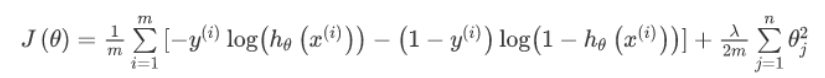
注：惩罚项中不包括θ0

In [81]:
# 逻辑函数（和前面一样）
def sigmoid(z):    
    return 1 / (1 + np.exp(-z))

# 代价函数（加入了正则项）
def costFunction(X,y,theta,lamda):
    A = sigmoid( X@ theta)# 假设函数

    first = y * np.log(A)
    second = (1-y) * np.log(1-A)
    reg = np.sum(np.power(theta[1:],2)) * (lamda / (2 * len(X))) # （正则化项）注意正则化项的θ是从j=1开始
    
    return -np.sum(first + second) / len(X) + reg

## 5.梯度下降函数

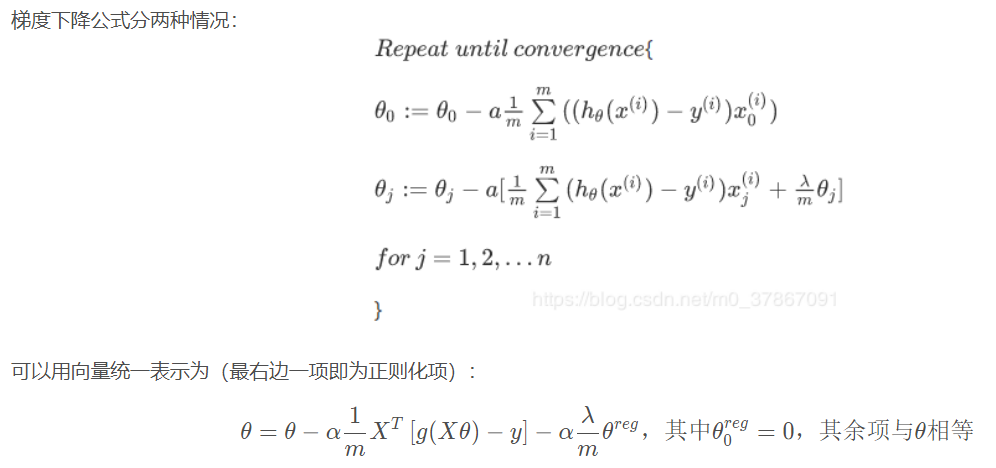

1.定义梯度下降函数：

In [82]:
# 加入了正则项之后的梯度下降：
def gradientDescent(X,y,theta,alpha,iters,lamda):

    costs = []

    for i in range(iters):
    
        reg = alpha * theta[1:] * (lamda / len(X)) # 先截取除了 θ_0 的 θ，此时reg维度为(27,1)
        reg = np.insert(reg,0,values=0,axis=0)     # 再在首项插入 0，使reg维度为(28,1)与θ一致。axis=0表示按行插入
    
        theta = theta - (X.T@(sigmoid(X@theta) - y)) * alpha / len(X) -reg
        cost = costFunction(X,y,theta,lamda)
        costs.append(cost)
    
        if i % 10000 == 0:
            print(cost)
        
    return theta,costs

2.给学习率alpha 、迭代次数iters和正则化系数lamda赋上初值，就能得到迭代结束后的最终参数theta_final，例如

In [83]:
alpha = 0.001
iters = 200000
lamda = 1

theta_final,costs = gradientDescent(X,y,theta,alpha,iters,lamda) 

0.6931343808528668
0.628221913287925
0.596463072418021
0.5763510102566433
0.5628165475229021
0.5534474099310801
0.5468450858494982
0.542130019119067
0.5387263926284954
0.5362474237382008
0.5344282150585453
0.5330844709684952
0.532086283508784
0.53134106549184
0.5307822056193638
0.5303613924709981
0.5300433412639418
0.5298021234352563
0.5296185827271516
0.5294784981741986


In [84]:
print(theta_final.shape)  # 一共有28个theta要确定

(28,)


## 6.绘制决策边界（欠拟合与过拟合）

1.结果可视化

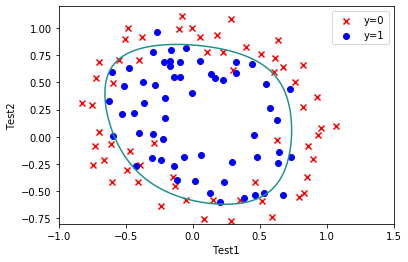

In [85]:
fig,ax = plt.subplots()

# 原始数据
ax.scatter(data[data['Accepted']==0]['Test 1'],data[data['Accepted']==0]['Test 2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test 1'],data[data['Accepted']==1]['Test 2'],c='b',marker='o',label='y=1')

#决策边界 （不太会）
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)  #生成网格点坐标矩阵
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
z = z @ theta_final
z = z.reshape(xx.shape) #获得决策边界
plt.contour(xx, yy, z, 0)
plt.ylim(-0.8, 1.2) #设置纵坐标范围

ax.legend()
ax.set(xlabel='Test1',ylabel='Test2')
plt.show()

In [102]:
def predict(X,theta):
    prob = sigmoid(X@theta)  
    return [1 if result >= 0.5 else 0 for result in prob] #返回一个列表

h_x = predict(X,theta_final)        # 在参数为theta_final下的假设输出，为列表类型
h_x = np.array(h_x)                 # 将列表转化为一维数组
h_x = h_x.reshape(len(h_x ),1)      # 转换为列向量

y = y.reshape(len(y),1)             # 将y转换为列向量，方便比较

print(h_x.shape)
print(y.shape)

(118, 1)
(118, 1)


In [103]:
acc = np.mean(h_x == y)    # 将假设输出和真实输出进行比较，求平均值
print(acc)

0.8305084745762712


## 7.参数设置

1.alpha 和iters不变，改变 正则化系数λ

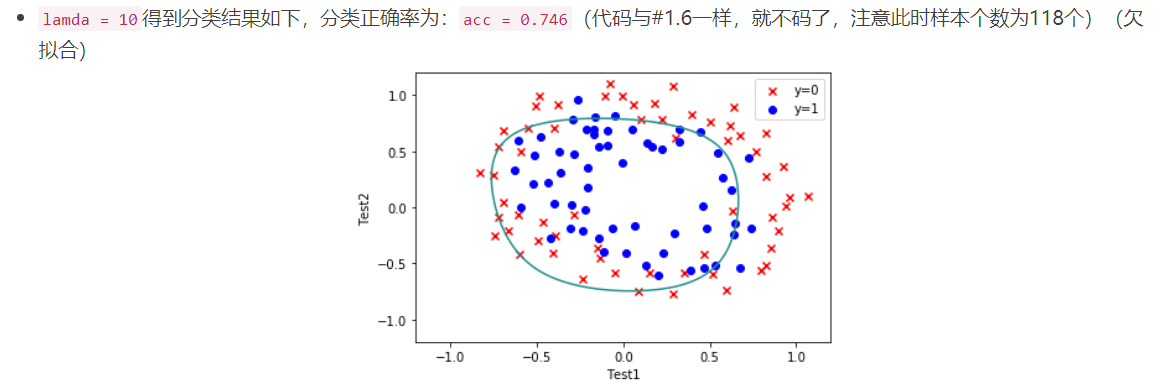

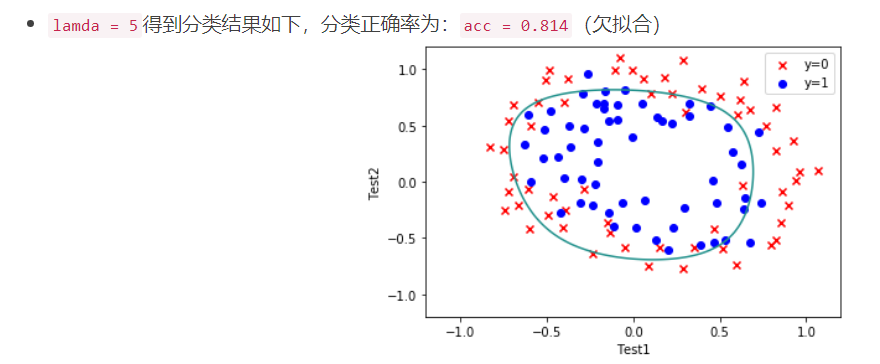

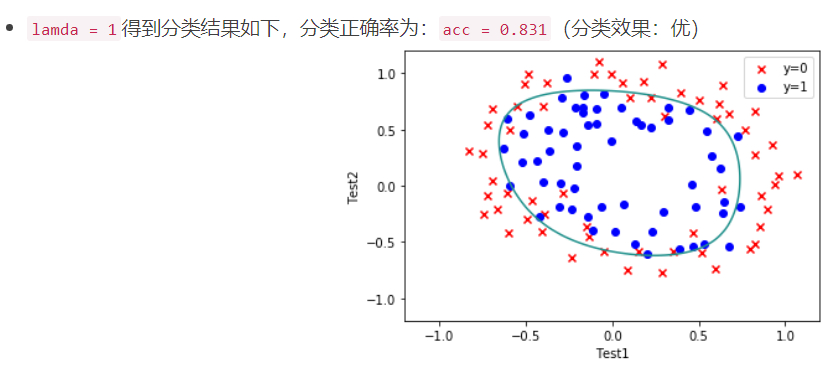

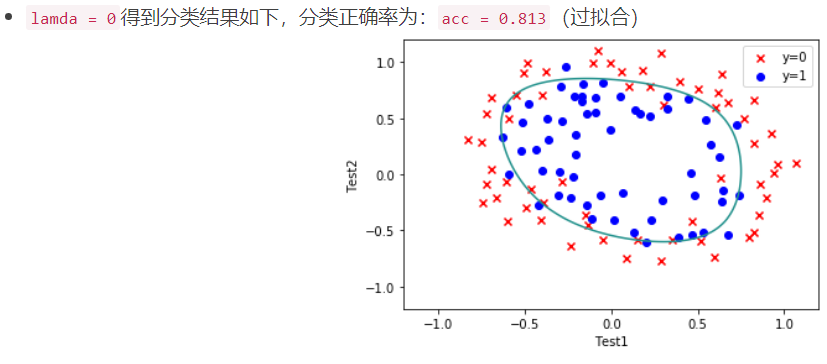

由上述结果可以看出：

当λ过大时，容易产生欠拟合

当λ过小时，容易产生过拟合（本例不太好展示，若样本点不多或者正负样本交叉较多，过拟合效果会很明显）